# Get Data

In [1]:
!rm -r G.A.I_MISCELLANEUS_RESOURCES mnist_data
!git clone https://github.com/Q-b1t/G.A.I_MISCELLANEUS_RESOURCES.git
!mkdir tweet_data
!unzip /content/G.A.I_MISCELLANEUS_RESOURCES/social_media_tweets/archive.zip -d tweet_data

rm: cannot remove 'G.A.I_MISCELLANEUS_RESOURCES': No such file or directory
rm: cannot remove 'mnist_data': No such file or directory
Cloning into 'G.A.I_MISCELLANEUS_RESOURCES'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 86 (delta 13), reused 76 (delta 6), pack-reused 0
Receiving objects: 100% (86/86), 20.97 MiB | 23.55 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Archive:  /content/G.A.I_MISCELLANEUS_RESOURCES/social_media_tweets/archive.zip
  inflating: tweet_data/tweets.csv   


# Data Preprocessing

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist

In [3]:
# list of common words that should not be included in the contexts as all of them are frequent but not meaningfull to any specific context
stopwords = [
  'the',
  'about',
  'an',
  'and',
  'are',
  'at',
  'be',
  'can',
  'for',
  'from',
  'if',
  'in',
  'is',
  'it',
  'of',
  'on',
  'or',
  'that',
  'this',
  'to',
  'you',
  'your',
  'with',
]


In [4]:
# delle funzioni importanti

url_filter = re.compile(r"(?:\@|https?\://)\S+") # expressione regolare per trovare degli username et degli url

def filter_tweets(s):
  """
  Questa funzione riceve degli string e lo pulishe togliendo tutti e due gli username e gli url.
  Argomenti:
    - s: uno string senza processare.
  """
  s = s.lower() # toglie le maiuscole
  s = url_filter.sub("",s) # sustituisce qualsiasi url/username che riesca a trovare
  return s


# Load data

In [5]:
# caricare i dati
df = pd.read_csv("/content/tweet_data/tweets.csv")
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


I dati hanno delle caratteristiche nelle quale noi non siamo interesatti. Allora, rimaneremo solanmente con i campioni di testo doppo il proccessamento.

In [6]:
text = df.text.tolist()
text = [filter_tweets(s) for s in text]

In [7]:
# transformare i dati in una matrice
tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords)
X = tfidf.fit_transform(text).todense()

In [8]:
# prendere un sottocampione dei dati per fare il esperimento piu efficace
N = X.shape[0]
idx = np.random.choice(N, size=2000, replace=False)
x = X[idx]
labels = df.handle[idx].tolist()

In [9]:
# calcolare le proporzione dei date que appartengono a ogni grappolo per verificare se il set di dati e equilibrato
p_trump = sum(1.0 if e == 'realDonaldTrump' else 0.0 for e in labels) / len(labels)
print(f"[~] Proporzione @realDonaldTrump: {p_trump}")
print(f"[~] Proporzione @HillaryClinton: {1 - p_trump}")

[~] PRoportion @realDonaldTrump: 0.51
[~] Proportion @HillaryClinton: 0.49


In [10]:
# transformare la matrice dei dati in una liste di distanze a coppie
dist_array = pdist(x)

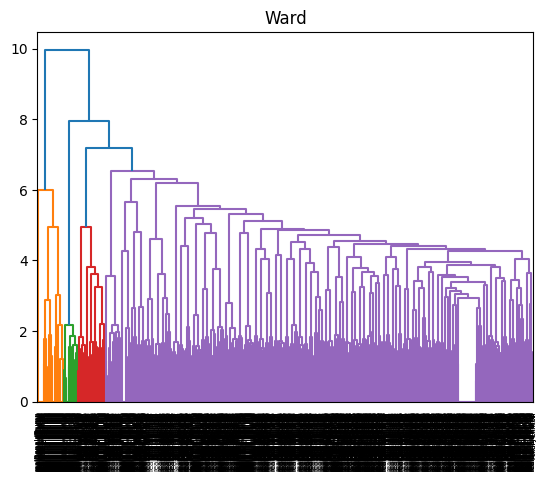

In [11]:
# calcolare la gerarchia
Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z, labels=labels)
plt.show()


In [12]:
Y = np.array([1 if e == 'realDonaldTrump' else 2 for e in labels])

In [13]:
C = fcluster(Z, 9, criterion='distance')
categories = set(C)
print(f"[~] valori in C:", categories)

[~] valori in C: {1, 2}


In [14]:
# e la stessa funzione che si puo trovare nella mia implementazione dei soft k means
def purity(true_labels, cluster_assignments, categories):
  N = len(true_labels)

  total = 0.0
  for k in categories:
    max_intersection = 0
    for j in categories:
      intersection = ((cluster_assignments == k) & (true_labels == j)).sum()
      if intersection > max_intersection:
        max_intersection = intersection
    total += max_intersection
  return total / N

In [15]:
print("[~] Purity:", purity(Y, C, categories)) # calolare la pureza

[~] Purity: 0.538


In [16]:
if (C == 1).sum() < (C == 2).sum():
  d = 1
  h = 2
else:
  d = 2
  h = 1

In [17]:

actually_donald = ((C == d) & (Y == 1)).sum()
donald_cluster_size = (C == d).sum()
print("[~] Pureza di grappolo @realDonaldTrump:", float(actually_donald) / donald_cluster_size)

actually_hillary = ((C == h) & (Y == 2)).sum()
hillary_cluster_size = (C == h).sum()
print("[~] Pureza di grappolo @HillaryClinton cluster:", float(actually_hillary) / hillary_cluster_size)



purity of @realDonaldTrump cluster: 0.9528301886792453
purity of @HillaryClinton cluster: 0.5147835269271384


# Random Forest

In [18]:
# vedremo il rendimento di un modello di foresta casuale nei datti solamente per curiosita
from sklearn.ensemble import RandomForestClassifier

In [21]:
type(X),type(df.handle)

(numpy.matrix, pandas.core.series.Series)

In [24]:
# convertire la matrice a dati primitivi accettato dai libreria
X_ = np.asarray(X)

In [25]:
random_forest = RandomForestClassifier()
random_forest.fit(X_, df.handle)
print("[~] Puntuazione della foresta casuale:", random_forest.score(X_, df.handle))

[~] Puntuazione della foresta casuale: 0.9553072625698324


Questi risultati sono quasi gli stessi di quel problema con il dataset mnist. La prestazione è quasi accertata al 100%.

# Analisi Finale
Adesso vogliamo vedere per ogni grappolo le parole che hanno la puntuazione tf-idf la piu alta.

In [30]:
word_2_index = tfidf.vocabulary_ # ottenere il vocabolario
t_avg = np.array(
    x[C == d].mean(axis=0)
).flatten()
t_sorted = sorted(word_2_index.keys(),key=lambda w: -t_avg[word_2_index[w]])

h_avg = np.array(
    x[C == h].mean(axis=0)
).flatten()
h_sorted = sorted(word_2_index.keys(), key=lambda w: -h_avg[word_2_index[w]])

In [31]:
print(f"[~] Top 10 termini in grappolo di Trump: {' '.join(t_sorted[:10])}")
print(f"[~] Top 10 termini in grappolo di Hillary: {' '.join(h_sorted[:10])}")


[~] Top 10 termini in grappolo di Trump: thank trump2016 makeamericagreatagain america trump today our donald my we
[~] Top 10 termini in grappolo di Hillary: trump hillary we will he great not donald our have
